##  "Pedicting Artist Hotness"

#### <font color=green> Will an artist be popular? </font>
#### <font color=green> What factors make an artist popular? </font>

#### Libraries in Use

In [69]:
import re
import csv
import pandas as pd
import IPython.display as ipd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder, StandardScaler
from functools import reduce
import seaborn as sns

#### Load the data:

In [70]:
df_Ffeatures = pd.read_csv("./prepdata/Audio_Features.csv", low_memory=False)

In [71]:
df_Sfeatures = pd.read_csv("./prepdata/Social_Features.csv", low_memory=False)

In [72]:
parse_dates = ['date_created_x', 'date_released']
df_info = pd.read_csv("./prepdata/info.csv", parse_dates = parse_dates)

#### Merge three dataframes:

In [73]:
merge_df=df_info.merge(df_Ffeatures,on='trackID').merge(df_Sfeatures,on='trackID')

In [74]:
merge_df.head(1)

,Unnamed: 0_x,trackID,bit_rate,comments_x,date_created_x,duration,favorites_x,genre_top,interest,license,...,liveness,speechiness,tempo,valence,Unnamed: 0,artist_discovery,artist_familiarity,artist_hotttnesss,song_currency,song_hotttnesss
0,0,2,256000,0,2008-11-26 01:48:12,168,2,Hip-Hop,4656,Attribution-NonCommercial-ShareAlike 3.0 Inter...,...,0.177647,0.15931,165.922,0.576661,3,0.38899,0.38674,0.40637,0.0,0.0


#### Statistical details of the artist_hotttnesss:

In [75]:
merge_df['artist_hotttnesss'].describe()

count    13129.000000
mean         0.346769
std          0.133279
min          0.000000
25%          0.265889
50%          0.343653
75%          0.451625
max          0.808122
Name: artist_hotttnesss, dtype: float64

#### convert the categorical columns into numeric :

In [76]:
le = LabelEncoder()
merge_df['name'] = le.fit_transform(merge_df['name'])
merge_df['duration'] = le.fit_transform(merge_df['duration'])
merge_df['genre_top'] = le.fit_transform(merge_df['genre_top'])
merge_df['date_created_x'] = le.fit_transform(merge_df['date_created_x'])
merge_df['tags'] = le.fit_transform(merge_df['genre_top'])

In [77]:
df_info.dtypes

Unnamed: 0                 int64
trackID                    int64
bit_rate                   int64
comments_x                 int64
date_created_x    datetime64[ns]
duration                   int64
favorites_x                int64
genre_top                 object
interest                   int64
license                   object
listens_x                  int64
number                     int64
tags_x                    object
comments_y                 int64
date_released     datetime64[ns]
favorites_y                int64
id_x                       int64
information               object
listens_y                  int64
tags_y                    object
tracks                     int64
favorites                  int64
id_y                       int64
members                   object
name                      object
tags                      object
dtype: object

#### Multiple Linear Regression :

In [78]:
i = merge_df[['acousticness', 'danceability', 'energy',  
       'instrumentalness','speechiness','tempo','name','valence','liveness','genre_top', 'duration','tags',
              'song_hotttnesss','date_created_x','bit_rate','artist_familiarity',
             'artist_discovery','artist_hotttnesss']]

#### Pearson correlation between pairs of features plot :

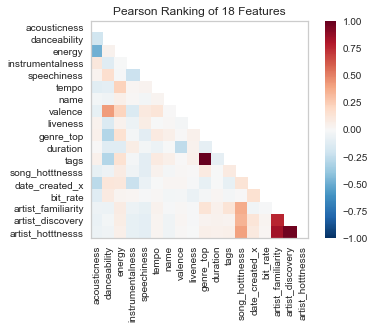

In [79]:
from yellowbrick.features import Rank2D

visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(i)
visualizer.poof()

#### Deleting variables with high Pearson correlation :

In [80]:
x = merge_df[['acousticness', 'danceability', 'energy',  
       'instrumentalness','speechiness','tempo','liveness','valence','name','genre_top','duration',
              'song_hotttnesss','date_created_x','artist_familiarity']]
y = merge_df['artist_hotttnesss']  

#### Ridge Regression:

In [81]:
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn import linear_model

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0) 

In [83]:
reg = linear_model.Ridge(alpha=.05,normalize=True)
reg.fit(x_train, y_train) 

Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

#### Coefficient:

In [84]:
coefficient=pd.DataFrame(reg.coef_, x.columns, columns=['Coefficient'])  

#### Intercept:

In [85]:
intercept=reg.intercept_

#### Prediction :

In [86]:
y_prediction = reg.predict(x_test)

In [87]:
Actual_Prediction= pd.DataFrame({'Actual': y_test, 'Predicted': y_prediction})

In [88]:
Actual_Prediction.head(5)

,Actual,Predicted
6665,0.308687,0.343535
397,0.254209,0.218316
5775,0.297655,0.292289
12346,0.391495,0.319671
7584,0.477212,0.381417


In [89]:
# r2_score is a statistical measure of how close the data are to the fitted regression line
from sklearn.metrics import r2_score
score = r2_score(y_test,y_prediction)
print(score)

0.7301821805069042


In [90]:
score2=reg.score(x_test,y_test)
score2

0.7301821805069042

In [91]:
from sklearn import metrics  

In [92]:
print('MAE:', metrics.mean_absolute_error(y_test, y_prediction))  
print('MSE:', metrics.mean_squared_error(y_test, y_prediction))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))  

MAE: 0.05381271351714
MSE: 0.004707126008876793
RMSE: 0.06860849808060801


#### Residuals Plot:

In [93]:
import yellowbrick

In [94]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

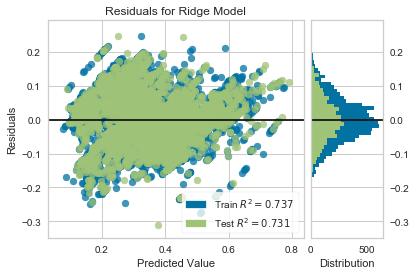

In [95]:
ridge = Ridge()
visualizer = ResidualsPlot(ridge)

visualizer.fit(x_train, y_train)  
visualizer.score(x_test, y_test)  
visualizer.poof()                


<font color=darkblue>It can be seen that from the histogram that error is normally distributed around zero, which indicates a well fitted model.</font>

<font color=darkblue>If the residuals are randomly dispersed around the horizontal axis, a linear regression model is usually appropriate for the data.</font>

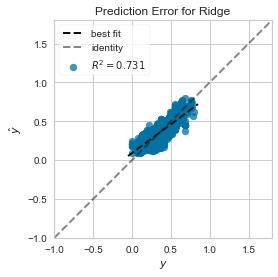

In [96]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(Ridge(alpha=0.5))
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.poof()

#### Conclusion:

1. The more people who are familair with artists, the more famous they will be in future.

2. It seems that the most energrtic songs(based on energy and liveness variables) can cause their artist will be famous.

3. It seems that the more acoustic sounds a given track has, the more famous artists will be.

4. The more popular get their song, the more popular get artist.



#### Linear Regression :

In [97]:
x1 = merge_df[['acousticness', 'danceability', 'energy',  
       'instrumentalness','speechiness','tempo','liveness','valence','name','genre_top','duration','song_currency',
              'song_hotttnesss','date_created_x','artist_familiarity']]
y1 = merge_df['artist_hotttnesss']  

In [98]:
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  

In [99]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=0)  

In [100]:
Regression_model= LinearRegression()  
Regression_model.fit(x1_train, y1_train)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [101]:
coefficient=pd.DataFrame(Regression_model.coef_, x1.columns, columns=['Coefficient'])  

In [102]:
intercept=Regression_model.intercept_

In [103]:
y_prediction1 = Regression_model.predict(x1_test)

In [104]:
Actual_Prediction1= pd.DataFrame({'Actual': y1_test, 'Predicted': y_prediction1})

In [105]:
Actual_Prediction1.head(5)

,Actual,Predicted
6665,0.308687,0.343785
397,0.254209,0.210585
5775,0.297655,0.290994
12346,0.391495,0.319737
7584,0.477212,0.383391


In [106]:
from sklearn.metrics import r2_score
score = r2_score(y1_test,y_prediction1)
print(score)

0.7291242093650601


In [107]:
from sklearn import metrics  
print('MAE:', metrics.mean_absolute_error(y1_test, y_prediction1))  
print('MSE:', metrics.mean_squared_error(y1_test, y_prediction1))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, y_prediction1)))  

MAE: 0.05376982976460857
MSE: 0.0047255829198687045
RMSE: 0.06874287541170143


#### Improving the accuracy:

1.Need more data : the echonest dataset is built for some of the tracks and therefore if echonest data is being used, we need to narrow down our analysis to a subset of all the tracks.

2.Using other features :

3.Trying different regression model :
It can be possible this data has not a linear relationship